# Listar tabelas do BD

In [5]:
query = " SHOW TABLES "
resultado = conexao.execute(query).fetchall()
print(resultado)

[('countries',), ('directors',), ('filmes_imdb',), ('genres',), ('languages',), ('locations',), ('stars',), ('writers',)]


# Importar Bibliotecas

In [1]:
import duckdb
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar com o BD - DuckDB

In [4]:
# Conecta ao DuckDB
# Conecta abrindo / criando um arquivo
conexao = duckdb.connect('../dados/filme_duckdb.db')

In [ ]:
query = 'SELECT Title,Year FROM filmes_imdb'
df = conexao.execute(query).fetchdf()
df

In [ ]:
query = 'SELECT Year,count(*) as Total ' \
'FROM filmes_imdb ' \
'WHERE Year > 2020 ' \
'GROUP BY Year ORDER BY Year'
df = conexao.execute(query).fetchdf()
df

In [ ]:
query = 'SELECT Year,count(*) as Total ' \
'FROM filmes_imdb ' \
'GROUP BY Year ORDER BY Year'
df = conexao.execute(query).fetchdf()
df_novo = df.copy()
df_novo


In [62]:
# Filtrando
df_2010 = df_novo[df_novo['Year'] > 2010]
df_filtrado = df_2010[df_2010['Total'] > 500]

df_600 = df_novo[df_novo['Total'] > 600]
if(df_600.empty):
    print("DataFrame is empty")
df_600

DataFrame is empty


,Year,Total


Text(0.5, 1.0, 'Gráfico de Barras: Total vs Total')

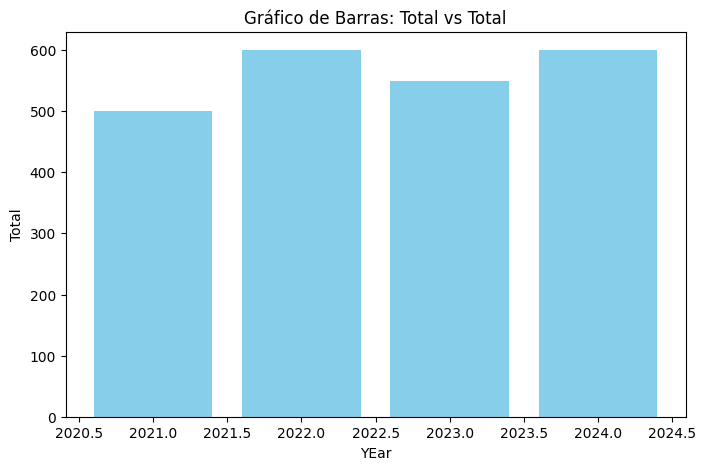

In [40]:
# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df['Year'], df['Total'], color='skyblue')
plt.xlabel('YEar')
plt.ylabel('Total')
plt.title('Gráfico de Barras: Total vs Total')

Text(0.5, 1.0, 'Gráfico de Barras DF_Filtrado: Total vs Total')

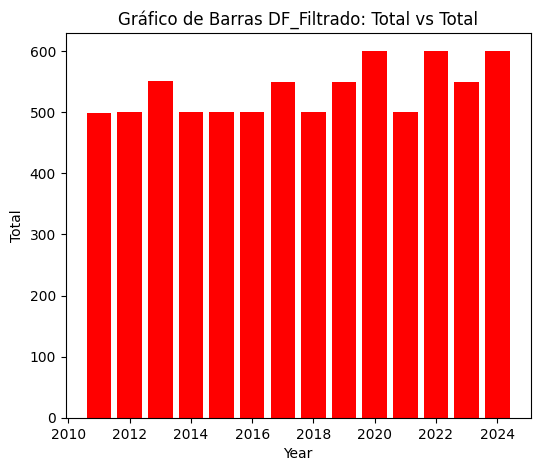

In [54]:
# Criando o gráfico de barras
plt.figure(figsize=(6, 5))
plt.bar(df_filtrado['Year'], df_filtrado['Total'], color='red')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Gráfico de Barras DF_Filtrado: Total vs Total')

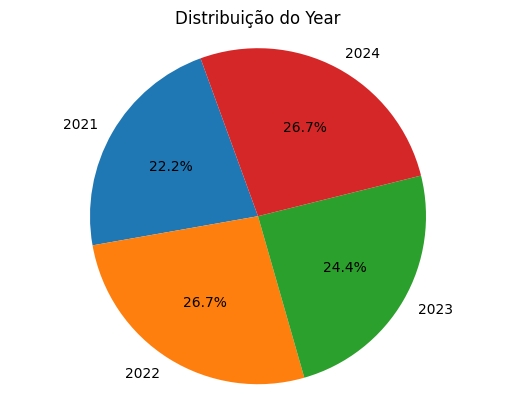

In [42]:
# Criando o gráfico de pizza
plt.pie(df['Total'], labels=df['Year'], autopct='%1.1f%%', startangle=110)
plt.title('Distribuição do Year')
plt.axis('equal')
plt.show()

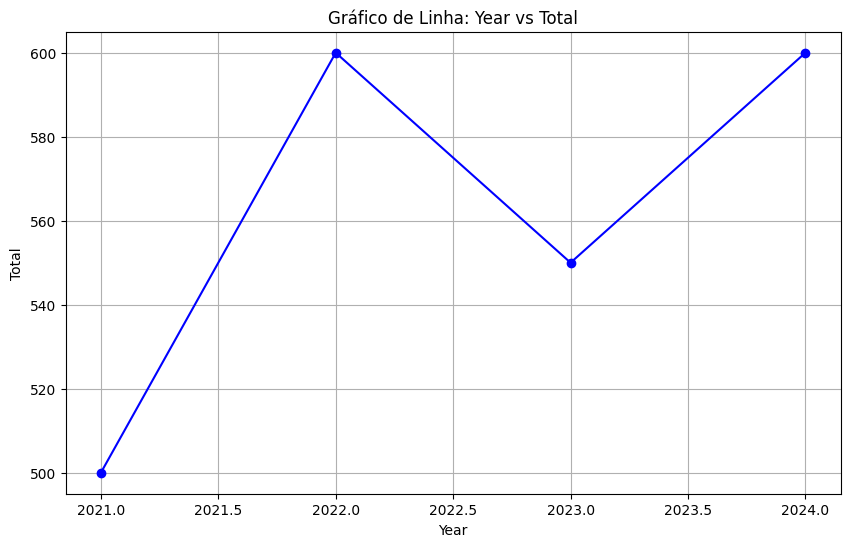

In [44]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Gráfico de Linha: Year vs Total')
plt.grid(True)

# Desconectar o BD

In [8]:
conexao.close()